<figure>
  <IMG SRC="../../logo/logo.png" WIDTH=250 ALIGN="right">
</figure>

# IHE Python course, 2017

## Reading, writing and working with shape files

T.N.Olsthoorn
2017-03-15


When working with GIS you import and export shape files. A shape file consists of 3 files with the same name but different extension. The one with .shp exteions contains the actual shapes, coordinates and spatial topology, while the one with the .dbf extension contains a table with the user data that is associated with each shape in the shapefile. In it, each shape file has a record of data values that belong to textual headers that indicated what the values mean. The contents of the .dbf file is, in fact a table, with headers, in which each line represents the data pertaining to one shape in the file. The third file, with .shx extension is merely a list of pointers that allow fast searching the shapefiles in GIS. It.s not important for us.

In fact, shape files are the most widely used means to exchange spatial data.

Shape files can be very useful to spatially attribute values to a model, like the conductivities, land use etc. Knowing how they work and how to deal with them can provide a lot of functionality in dealing with spatial data, with or without a GIS.

If you the comman

**import shapefile as shp**

does not work, you should install pyshp

fire up your cmd window and type

**pip install pyshp**

The documentation is in the wiki of the pyshp project on github:

https://github.com/GeospatialPython/pyshp/wiki

The more general functionalities are impoted next:

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import shapefile as shp
from pprint import pprint

We need a function that will tell us whether a coordinate pair is inside a shape or not. This function exists in matplotlib.path and is called Path. Path creates a polygon which can then check if points are inside or outside it. Because I like the word Polygon better than Path for this goal, I import the Path class and call it Polygon here.

In [41]:
from matplotlib.path import Path as Polygon

I define a function inpoly that checks whether the coordinates x,y are inside the shape given by pgcoords. The function returns a logical array (boolean area) of the same shape as the inputs x and y such that points inside the polygon are True in the array and False otherwise.

Notice that inpoly uses the imported Polygon constructor on line 8.

The function does some import checking and guarantees that the shape of the boolean output array is the same as the input array x and y.

The checking is done in lline 27 using the method pgon.contains_points(xy)

This function is very practical, so you may want to use it in other projects as well.


In [42]:
def inpoly(x, y, pgcoords):
    """Returns bool array [Ny, Nx] telling which grid points are inside polygon

    """
    try:
        isinstance(pgcoords,(list, tuple, np.ndarray))
        len(pgcoords[0])==2
        pgon = Polygon(pgcoords)
    except:
        print('pgcoords must be like [(0, 0), (1, 0), ..] or\n'
            +'an np.ndarray of shape [Np, 2]')
        raise TypeError("Can't create polygon, pgcoords error")

    try:
        x = np.array(x, dtype=float)
        y = np.array(y, dtype=float)
        x.shape == y.shape
    except:
        raise err.ShapeError("x and y not np.ndarrays with same shape.")

    if len(x.shape)==1:
        Y, Y = np.meshgrid(x, y)
    else:
        X = x
        Y = y
    xy = np.vstack((X.ravel(), Y.ravel())).T
    return pgon.contains_points(xy).reshape(X.shape)

CD to the exercises/Mar21 dictory, where we have a shape file stored in the subdirectory Sectie (Section)

In [43]:
os.listdir('.')

['.DS_Store',
 '.ipynb_checkpoints',
 'Assela.ipynb',
 'collatz.py',
 'py_exploratory_comp_4-Copy2.ipynb',
 'randomQuizGenerator.py',
 'Sectie',
 'shapefiles.ipynb',
 'sorting.ipynb']

Define the director where the shape file is and get the file name

In [44]:
# directory (this will be different on your computer)

shpdir =  os.path.join('.', 'Sectie')

fname  = os.listdir(shpdir)[0]

print("The shapefile to work with: ",fname)

The shapefile to work with:  Sectie_20170307.dbf


Open a reader to read the shapefile:

Then show its attributes, so that we can see what we can do with it.

In [45]:
rdr = shp.Reader(os.path.join(shpdir, fname))

print("\nAttributes and methods accessible throuhgh this reader:\n")

# learn to read and create comprehensions, this is one
pprint([p for p in dir(rdr) if not p.startswith('_')])


Attributes and methods accessible throuhgh this reader:

['bbox',
 'dbf',
 'elevation',
 'fields',
 'iterRecords',
 'iterShapeRecords',
 'iterShapes',
 'load',
 'measure',
 'numRecords',
 'record',
 'records',
 'shape',
 'shapeName',
 'shapeRecord',
 'shapeRecords',
 'shapeType',
 'shapes',
 'shp',
 'shpLength',
 'shx']


So we can read the bounding box of all the shapes in the file, its table, its elevaton (if specified), its fiels names etc.

Let's get some useful information about the shapefile. Here, the names of the data fields of each shape (again a comprehension is used to get them in a list)

In [47]:
rdr.fields

[('DeletionFlag', 'C', 1, 0),
 ['nr', 'N', 10, 0],
 ['X', 'N', 24, 15],
 ['Y', 'N', 24, 15],
 ['Color', 'C', 15, 0],
 ['FM', 'C', 20, 0],
 ['LAYERNM', 'C', 25, 0],
 ['order', 'N', 2, 0],
 ['SALT', 'N', 1, 0],
 ['PEFF', 'N', 11, 5],
 ['AL', 'N', 11, 5],
 ['KH', 'N', 21, 10],
 ['KV', 'N', 21, 10],
 ['SS', 'N', 16, 8],
 ['SY', 'N', 16, 8],
 ['SALINITY', 'N', 11, 5]]

Each field not only gives the name of the data but also whether it string )'C' or a number 'N' and its length (first number). The second number is the number of didgets, when the number is floating point.

To get only the field name in a list, we use an other comprehension:

In [48]:
fldNames = [p[0] for p in rdr.fields]

print(fldNames)

['DeletionFlag', 'nr', 'X', 'Y', 'Color', 'FM', 'LAYERNM', 'order', 'SALT', 'PEFF', 'AL', 'KH', 'KV', 'SS', 'SY', 'SALINITY']


you may use
>rdr.iterShapes() to iterate over the shapes in the shapefile

>rdr.iterRecords() to iterate over the records in the shapefile

>rdr.iterShapeRecords() to iterate over both simultaneously


Print the records in the dbf file, one for each shape:

In [49]:
print(fldNames)
for r in rdr.iterRecords():
    print(r)

['DeletionFlag', 'nr', 'X', 'Y', 'Color', 'FM', 'LAYERNM', 'order', 'SALT', 'PEFF', 'AL', 'KH', 'KV', 'SS', 'SY', 'SALINITY']
[1, 0.0, -10.0, 'y', 'watervoerend', 'aquifer', 1, 0, 0.2, 100.0, 10.0, 10.0, 0.0001, 0.2, 0.0]
[2, 0.0, -3.5, 'b', 'slappe lagen', 'confining', 2, 0, 0.5, 100.0, 0.001, 0.0005, 0.0001, 0.05, 0.0]
[3, 17.5, -3.5, 'b', 'schil', 'confining', 3, 0, 0.55, 100.0, 0.0005, 0.0005, 0.0001, 0.05, 0.0]
[4, 22.5, -3.5, 'y', 'kern', 'aquifer', 4, 0, 0.3, 100.0, 5.0, 5.0, 0.0001, 0.2, 0.0]


Read the shapeRecords from the shapefile into a list:

In [50]:
shprecs = rdr.shapeRecords()

shprecs

Each of these ShapeRecods contain both the shape and its record (data).

Show that we can itereate over the ShapeRecords, get the shape and the record from it and do somthing with it:

In [14]:
for i, sr in enumerate(shprecs):
    print("Shape number ", i+1)
    print("Bounding box = ",sr.shape.bbox)
    print("Record       = ",sr.record)
    print()

Shape number  1
Bounding box =  [0.0, -10.0, 80.0, -6.0]
Record       =  [1, 0.0, -10.0, 'y', 'watervoerend', 'aquifer', 1, 0, 0.2, 100.0, 10.0, 10.0, 0.0001, 0.2, 0.0]

Shape number  2
Bounding box =  [0.0, -6.0, 80.0, -3.5]
Record       =  [2, 0.0, -3.5, 'b', 'slappe lagen', 'confining', 2, 0, 0.5, 100.0, 0.001, 0.0005, 0.0001, 0.05, 0.0]

Shape number  3
Bounding box =  [17.5, -3.5, 55.0, 0.0]
Record       =  [3, 17.5, -3.5, 'b', 'schil', 'confining', 3, 0, 0.55, 100.0, 0.0005, 0.0005, 0.0001, 0.05, 0.0]

Shape number  4
Bounding box =  [22.5, -3.5, 45.0, -0.75]
Record       =  [4, 22.5, -3.5, 'y', 'kern', 'aquifer', 4, 0, 0.3, 100.0, 5.0, 5.0, 0.0001, 0.2, 0.0]



What attributes/methods has a shape?

Simply use a comprehension to show their names:

In [15]:
[att for att in dir(sr.shape) if not att.startswith('_')]

['bbox', 'parts', 'points', 'shapeType']

Let's now get serious and define a model grid containing all shapes. Simply use the overall bounding box to get the grid extension.

Here is the box:

In [16]:
rdr.bbox

[0.0, -10.0, 80.0, 0.0]

Get the indices from the bounding box so that we can plot is in a single line:

In [17]:
ix = [0, 2, 2, 0, 0]  # x-indices in rdr.box
iy = [1, 1, 3, 3, 1]  # y-indices

With these indices in sequence we can get the x and y coordinates of the bbox so arranged that the bbox is plotted (in red with linewidth 3, so that it shows up at the boundary of the plot.

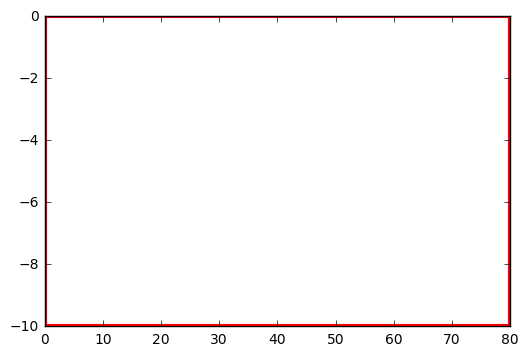

In [51]:
plt.plot(np.array([rdr.bbox[i] for i in ix]),
         np.array([rdr.bbox[i] for i in iy]), 'r', lw=3)
plt.show()

Now see how we can access the point os a shape, here the first shape in our shape-records list, so shprecs[0].shape.

In [52]:
np.array(shprecs[0].shape.points)

array([[  0.,  -6.],
       [ 10.,  -6.],
       [ 20.,  -6.],
       [ 30.,  -6.],
       [ 40.,  -6.],
       [ 50.,  -6.],
       [ 60.,  -6.],
       [ 70.,  -6.],
       [ 80.,  -6.],
       [ 80., -10.],
       [ 70., -10.],
       [ 60., -10.],
       [ 50., -10.],
       [ 40., -10.],
       [ 30., -10.],
       [ 20., -10.],
       [ 10., -10.],
       [  0., -10.],
       [  0.,  -6.]])

With all this in place we can plot the bounding box of all shapes and then each shape itself using its points as an array.

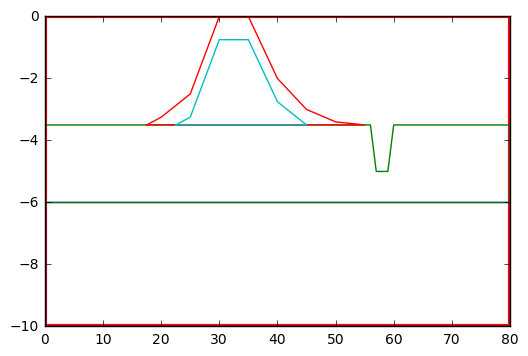

In [53]:
plt.plot(np.array([rdr.bbox[i] for i in ix]),
         np.array([rdr.bbox[i] for i in iy]), 'r', lw=3)

for sr in shprecs:
    pnts = np.array(sr.shape.points)
    plt.plot(pnts[:,0], pnts[:,1])
plt.show()

The next step is to fill the grid points that fall within each shape with the data value that belongs to the shape. We'll use the horizontal conductivity KH that is contained in each shape's record as can be seen from the field names above.

First generate a grid. A grid is an array with the x coordinate of each cell and one with the y coordinate of each cell.

We'll choose x, y as the coordinates of the cell boundaries (the grid lines) and xm, ym as the coordinates of the cell centers.

Choosing 81 x-grid lines between the horizontal extend 0 and 80 m gives cells of 1 m width.
Choosing 41 y-grid lines between the vertical exten -10 and 0 m gives cells of 0.25 m height.

In [54]:
# grid line coordinates
x = np.linspace(rdr.bbox[0], rdr.bbox[2], 81)
y = np.linspace(rdr.bbox[1], rdr.bbox[3], 41)

# cell center coordinates
xm = 0.5 * (x[:-1] + x[1:])
ym = 0.5 * (y[:-1] + y[1:])

# generage a full 2D array for both the x and y coordinates
XM, YM = np.meshgrid(xm, ym)

Then fill in the data value for each grid and plot the result, once color per shape.

ikh is the index for the field 'KH' (see fields above)

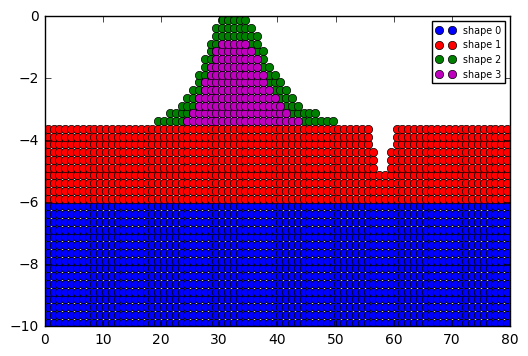

In [55]:
fig, ax = plt.subplots()

ikh = fldNames.index('KH')
KH = np.zeros_like(XM)      # 2D array to fill with conductivities from shapes

# iterate ove the list of shaperecords. In each loop the next index,
# the next color for the plot and the next records is given. 
for i, clr, sr in zip(range(len(shprecs)), "brgmcy", shprecs):
    pnts = sr.shape.points             # the shape coordinates
    inarray = inpoly(XM, YM, pnts)     # boolean array to match the shape
    KH[inarray] = sr.record[ikh]       # fill in the value
    ax.plot(XM[inarray], YM[inarray], clr+'o', label="shape {}".format(i))
ax.legend(loc='best', fontsize='x-small')
plt.show()

Et voilà !

Now the array can be used as input for a groundwater model for example.

## Some ways to show the array

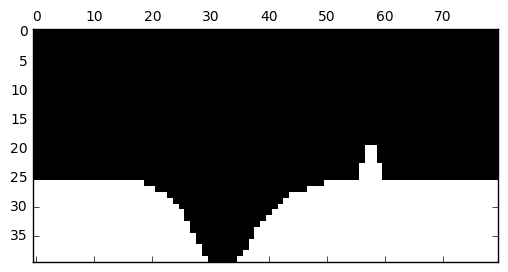

In [59]:
# plt.spy shows where an array is non-zero

plt.spy(KH)
plt.show() 

Show the KH array the Matlab way, which is much easier to see. In spyder you may inspect it in the variable window as a kind of spreadsheet.

Because the array is far too wide to print on one line, we chop it in chunk of 8 columns
and print one chunk after the other.

First generate the indices to cut the array in pieces then use np.split( )
Put this together with the indices in a zip, so that the in each for loop we get
the next index and the next array.
For each chunk plot which columns it has.
Then cut the chunk in lines and print each line separately.
Notice that we generate the format dynamically in the print statement using the
length L, i.e. the number of values in the line.

In [74]:
indices = range(0, KH.shape[1], 8)

for i, kh in zip(indices, np.split(KH, indices[1:], axis=1)):
    print("Columns {}:{}".format(i,i+kh.shape[1]))
    for L in kh:
        print(("{:8.4g}" * len(L)).format(*L))
    print()


Columns 0:8
      10      10      10      10      10      10      10      10
      10      10      10      10      10      10      10      10
      10      10      10      10      10      10      10      10
      10      10      10      10      10      10      10      10
      10      10      10      10      10      10      10      10
      10      10      10      10      10      10      10      10
      10      10      10      10      10      10      10      10
      10      10      10      10      10      10      10      10
      10      10      10      10      10      10      10      10
      10      10      10      10      10      10      10      10
      10      10      10      10      10      10      10      10
      10      10      10      10      10      10      10      10
      10      10      10      10      10      10      10      10
      10      10      10      10      10      10      10      10
      10      10      10      10      10      10      10      10
      10     

Another way to show an array is to plot it using plt.matshow. Each cell will be colored according to its value. Clearly if the values differ too little, the show up as the same value. This is actually the case here.

Notice that matshow does not use the coordinates, it uses the index of the rows and columns. Because of this, it's plot upside down, just as was the case with plt.spy above.

The kh values of the different shapes:  [10.0, 0.0005, 0.0005, 5.0]


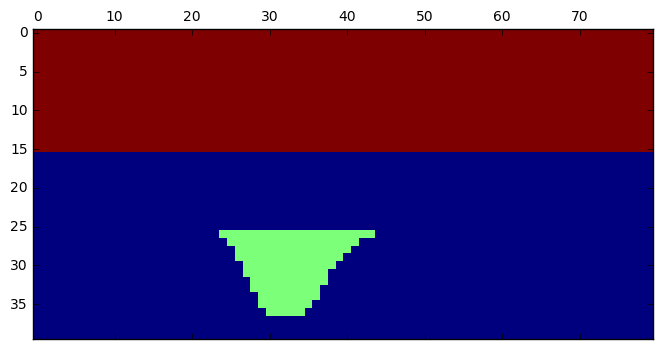

In [75]:
print("The kh values of the different shapes: ", [sr.record[ikh] for sr in shprecs])

plt.matshow(KH)
plt.show()

You could also contour the shapes, but that has the same problems as with matshow: because of the small differences between the values of different shapes. However, the contourf function uses the coordinates of the grid, so it's plotted correctly on scale and right side up.

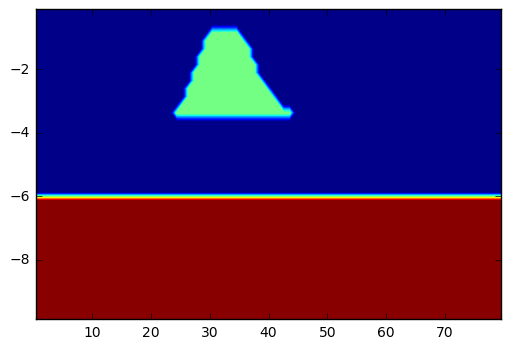

In [76]:
plt.contourf(XM, YM, KH, 50)
plt.show()

# Conclusion

The shapefile module makes reading shapefiles straightforward. Combined with inpoly (matplotlib.path) it's now easy to fill an array based on shape contours with their associated values. This is extremely useful when assigning spatial data to arrays of simulators like the finite difference model MODFLOW